In [ ]:
#DEPENDENCIAS
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
import seaborn as sns
import spacy
import subprocess
import sys

ruta = r"C:\Users\sandr\Documents\scrp_tiktok_tfg\data\dataset_sephora.json"

df = pd.read_json(ruta)
pd.reset_option('display.max_colwidth')


In [286]:
df.head()

,source,brand,title,description,categories,options,variants,medias,stats
0,"{'id': 'P455418', 'crawlUrl': 'https://www.sep...",ILIA,Super Serum Skin Tint SPF 40 Skincare Foundation,<p><strong>What it is: </strong>An award-winni...,"[Makeup, Face, Foundation]","[{'type': 'Color', 'values': [{'id': 'Skye ST0...","[{'id': '2428746', 'sku': '2428746', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 6426, 'rating': 3.6852, 'loves..."
1,"{'id': 'P508264', 'crawlUrl': 'https://www.sep...",Rare Beauty by Selena Gomez,Mini Soft Pinch Liquid Blush,"<b>What it is: </b>Weightless, long-lasting li...","[Makeup, Mini Size]","[{'type': 'Color', 'values': [{'id': 'Truth', ...","[{'id': '2792489', 'sku': '2792489', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 382, 'rating': 4.445, 'lovesCo..."
2,"{'id': 'P455936', 'crawlUrl': 'https://www.sep...",Summer Fridays,Lip Butter Balm for Hydration & Shine,<p><strong>What it is: </strong>A silky vegan ...,"[Skincare, Lip Balms & Treatments]","[{'type': 'Color', 'values': [{'id': 'Vanilla ...","[{'id': '2495505', 'sku': '2495505', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 12080, 'rating': 4.3445, 'love..."
3,"{'id': 'P1272', 'crawlUrl': 'https://www.sepho...",Benefit Cosmetics,Benetint Liquid Lip + Cheek Blush Stain,<b>What it is: </b>A collection of fan-fave li...,"[Makeup, Cheek, Blush]","[{'type': 'Color', 'values': [{'id': 'Playtint...","[{'id': '2465128', 'sku': '2465128', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 5022, 'rating': 4.1326, 'loves..."
4,"{'id': 'P476718', 'crawlUrl': 'https://www.sep...",ONE/SIZE by Patrick Starrr,Mini On 'Til Dawn Mattifying Waterproof Settin...,<b>What it is:</b> A waterproof setting spray ...,"[Makeup, Mini Size]","[{'type': 'Size', 'values': [{'id': '1 oz/ 46 ...","[{'id': '2490704', 'sku': '2490704', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 2123, 'rating': 3.8516, 'loves..."


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       2352 non-null   object
 1   brand        2352 non-null   object
 2   title        2352 non-null   object
 3   description  2352 non-null   object
 4   categories   2352 non-null   object
 5   options      2352 non-null   object
 6   variants     2352 non-null   object
 7   medias       2352 non-null   object
 8   stats        2352 non-null   object
dtypes: object(9)
memory usage: 165.5+ KB


In [288]:
# Aplanar la columna "source" para crear subcolumnas
df_source = pd.json_normalize(df['source'])
df_stats = pd.json_normalize(df['stats'])

# Concatenar con el DataFrame principal
df_cleaned = pd.concat([df.drop(['source', 'stats'], axis=1), df_source, df_stats], axis=1)

df_cleaned.head()

# Crawl URL: Estas son las URLs que los crawlers acceden para recopilar datos, y son importantes para tu análisis porque reflejan las distintas versiones de una página web que podrían existir (con parámetros, filtros, etc.). A través del scrapeo, obtienes esta URL para acceder a su contenido.
# Canonical URL: Esta es más útil para el SEO, ya que indica cuál es la versión preferida de la página, especialmente si tienes múltiples URLs que muestran el mismo contenido. Para scrapeo, la canonical puede ser relevante si quieres obtener la URL "oficial", pero si tu objetivo es obtener todo el contenido que el sitio muestra, probablemente quieras centrarte en las URLs que los crawlers rastrean, no solo las canónicas.
# Medias: almacena las fotos de las variantes de producto, es decir, de los diferentes tonos que tiene un mismo producto, no relevante para nuestro análisis.


,brand,title,description,categories,options,variants,medias,id,crawlUrl,canonicalUrl,retailer,currency,reviewCount,rating,lovesCount
0,ILIA,Super Serum Skin Tint SPF 40 Skincare Foundation,<p><strong>What it is: </strong>An award-winni...,"[Makeup, Face, Foundation]","[{'type': 'Color', 'values': [{'id': 'Skye ST0...","[{'id': '2428746', 'sku': '2428746', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...",P455418,https://www.sephora.com/product/ilia-super-ser...,https://www.sephora.com/product/ilia-super-ser...,SEPHORA,USD,6426,3.6852,631190
1,Rare Beauty by Selena Gomez,Mini Soft Pinch Liquid Blush,"<b>What it is: </b>Weightless, long-lasting li...","[Makeup, Mini Size]","[{'type': 'Color', 'values': [{'id': 'Truth', ...","[{'id': '2792489', 'sku': '2792489', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...",P508264,https://www.sephora.com/product/mini-soft-pinc...,https://www.sephora.com/product/mini-soft-pinc...,SEPHORA,USD,382,4.4450,598270
2,Summer Fridays,Lip Butter Balm for Hydration & Shine,<p><strong>What it is: </strong>A silky vegan ...,"[Skincare, Lip Balms & Treatments]","[{'type': 'Color', 'values': [{'id': 'Vanilla ...","[{'id': '2495505', 'sku': '2495505', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...",P455936,https://www.sephora.com/product/summer-fridays...,https://www.sephora.com/product/summer-fridays...,SEPHORA,USD,12080,4.3445,3039957
3,Benefit Cosmetics,Benetint Liquid Lip + Cheek Blush Stain,<b>What it is: </b>A collection of fan-fave li...,"[Makeup, Cheek, Blush]","[{'type': 'Color', 'values': [{'id': 'Playtint...","[{'id': '2465128', 'sku': '2465128', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...",P1272,https://www.sephora.com/product/benetint-cheek...,https://www.sephora.com/product/benetint-cheek...,SEPHORA,USD,5022,4.1326,564469
4,ONE/SIZE by Patrick Starrr,Mini On 'Til Dawn Mattifying Waterproof Settin...,<b>What it is:</b> A waterproof setting spray ...,"[Makeup, Mini Size]","[{'type': 'Size', 'values': [{'id': '1 oz/ 46 ...","[{'id': '2490704', 'sku': '2490704', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...",P476718,https://www.sephora.com/product/one-size-by-pa...,https://www.sephora.com/product/one-size-by-pa...,SEPHORA,USD,2123,3.8516,401576


In [289]:
# Eliminar columnas innecesarias: 
df_cleaned = df_cleaned.drop(['retailer', 'canonicalUrl', 'medias'], axis=1)

In [ ]:
# Función para eliminar las etiquetas HTML
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text
df_cleaned['description'] = df_cleaned['description'].apply(remove_html_tags)
print(df_cleaned['description'].iloc[0])


What it is: An award-winning tinted serum with light, dewy coverage, mineral SPF, and potent levels of skincare ingredients.Coverage: LightFinish: RadiantFormulation: LiquidHighlighted Ingredients: - Plant-Based Squalane: Seals in moisture without clogging pores.- Niacinamide: Visibly smooths skin texture and refines uneven tone.- Hyaluronic Acid: Draws hydration into skin to visibly plump and replenish.Ingredient Callouts: This product is vegan, gluten-free, cruelty-free, and comes in recyclable packaging.What Else You Need to Know: This clean skin tint combines makeup, skincare, and SPF into one step. Clinically proven to hydrate, protect, and improve the appearance of pores, blemishes, redness, and wrinkles with every wear. Choose from 30 shades that blend in seamlessly with a dewy finish for skin that looks and feels alive.Clinical Results:Clinically proven to improve and protect skin.*100% said moisture was boosted.**94% saw improvement of blemishes, redness, and uneven tone.***90

In [ ]:
def extract_description_values(description):
    values = {}
    
    # Columna: What it is
    what_it_is_pattern = r'What it is:\s*(.+?)(?=Coverage:|Formulation:|Highlighted Ingredients:|Ingredient Callouts:|What Else You Need to Know:|$)'
    what_it_is_match = re.search(what_it_is_pattern, description)
    if what_it_is_match:
        values['What it is'] = what_it_is_match.group(1).strip()
    
    # Columnas: Coverage, Finish, Formulation
    coverage_pattern = r'Coverage:\s*(\w+)\s*Finish:\s*(\w+)\s*Formulation:\s*(\w+)'
    coverage_match = re.search(coverage_pattern, description)
    if coverage_match:
        values['Coverage'] = coverage_match.group(1).strip()
        values['Finish'] = coverage_match.group(2).strip()
        values['Formulation'] = coverage_match.group(3).strip()
    
    # Columna: Highlighted Ingredients
    ingredients_pattern = r'Highlighted Ingredients:\s*(.+?)(?=Ingredient Callouts:|$)'
    ingredients_match = re.search(ingredients_pattern, description)
    if ingredients_match:
        values['Highlighted Ingredients'] = ingredients_match.group(1).strip()
    
    # Columna: What Else You Need to Know
    what_else_pattern = r'What Else You Need to Know:\s*(.+?)(?=Clinical Results:|$)'
    what_else_match = re.search(what_else_pattern, description)
    if what_else_match:
        values['What Else You Need to Know'] = what_else_match.group(1).strip()
    
    return values

description_data = df_cleaned['description'].apply(extract_description_values)

# Crear nuevas columnas a partir de los valores extraídos
for col in description_data.iloc[0].keys():
    df_cleaned[col] = description_data.apply(lambda x: x.get(col, ''))
df_cleaned.head()

,brand,title,description,categories,options,variants,id,crawlUrl,currency,reviewCount,rating,lovesCount,What it is,Coverage,Finish,Formulation,Highlighted Ingredients,What Else You Need to Know
0,ILIA,Super Serum Skin Tint SPF 40 Skincare Foundation,What it is: An award-winning tinted serum with...,"[Makeup, Face, Foundation]","[{'type': 'Color', 'values': [{'id': 'Skye ST0...","[{'id': '2428746', 'sku': '2428746', 'price': ...",P455418,https://www.sephora.com/product/ilia-super-ser...,USD,6426,3.6852,631190,"An award-winning tinted serum with light, dewy...",Light,Radiant,LiquidHighlighted,- Plant-Based Squalane: Seals in moisture with...,"This clean skin tint combines makeup, skincare..."
1,Rare Beauty by Selena Gomez,Mini Soft Pinch Liquid Blush,"What it is: Weightless, long-lasting liquid bl...","[Makeup, Mini Size]","[{'type': 'Color', 'values': [{'id': 'Truth', ...","[{'id': '2792489', 'sku': '2792489', 'price': ...",P508264,https://www.sephora.com/product/mini-soft-pinc...,USD,382,4.4450,598270,"Weightless, long-lasting liquid blush with up ...",,,,,This blush creates a pinch-perfect flush using...
2,Summer Fridays,Lip Butter Balm for Hydration & Shine,What it is: A silky vegan balm that hydrates a...,"[Skincare, Lip Balms & Treatments]","[{'type': 'Color', 'values': [{'id': 'Vanilla ...","[{'id': '2495505', 'sku': '2495505', 'price': ...",P455936,https://www.sephora.com/product/summer-fridays...,USD,12080,4.3445,3039957,A silky vegan balm that hydrates and soothes d...,,,,- Shea and Murumuru Seed Butters: Natural mois...,This formula delivers soothing moisture to par...
3,Benefit Cosmetics,Benetint Liquid Lip + Cheek Blush Stain,What it is: A collection of fan-fave lip and c...,"[Makeup, Cheek, Blush]","[{'type': 'Color', 'values': [{'id': 'Playtint...","[{'id': '2465128', 'sku': '2465128', 'price': ...",P1272,https://www.sephora.com/product/benetint-cheek...,USD,5022,4.1326,564469,A collection of fan-fave lip and cheek tints t...,,,,,"Cherry, mango, pink lemonade—whatever tint col..."
4,ONE/SIZE by Patrick Starrr,Mini On 'Til Dawn Mattifying Waterproof Settin...,What it is: A waterproof setting spray that gi...,"[Makeup, Mini Size]","[{'type': 'Size', 'values': [{'id': '1 oz/ 46 ...","[{'id': '2490704', 'sku': '2490704', 'price': ...",P476718,https://www.sephora.com/product/one-size-by-pa...,USD,2123,3.8516,401576,A waterproof setting spray that gives skin an ...,,,,- Green Tea Extract: Helps tighten pores.- Wit...,With an aerosol spray application that is ligh...


In [ ]:
# Extraemos el primer valor de 'price' 
df_cleaned['price'] = df_cleaned['variants'].apply(lambda x: x[0]['price'] if isinstance(x, list) and len(x) > 0 else None)

df_cleaned.head()

,brand,title,description,categories,options,variants,id,crawlUrl,currency,reviewCount,rating,lovesCount,What it is,Coverage,Finish,Formulation,Highlighted Ingredients,What Else You Need to Know,price
0,ILIA,Super Serum Skin Tint SPF 40 Skincare Foundation,What it is: An award-winning tinted serum with...,"[Makeup, Face, Foundation]","[{'type': 'Color', 'values': [{'id': 'Skye ST0...","[{'id': '2428746', 'sku': '2428746', 'price': ...",P455418,https://www.sephora.com/product/ilia-super-ser...,USD,6426,3.6852,631190,"An award-winning tinted serum with light, dewy...",Light,Radiant,LiquidHighlighted,- Plant-Based Squalane: Seals in moisture with...,"This clean skin tint combines makeup, skincare...","{'current': 4800, 'original': 4800, 'stockStat..."
1,Rare Beauty by Selena Gomez,Mini Soft Pinch Liquid Blush,"What it is: Weightless, long-lasting liquid bl...","[Makeup, Mini Size]","[{'type': 'Color', 'values': [{'id': 'Truth', ...","[{'id': '2792489', 'sku': '2792489', 'price': ...",P508264,https://www.sephora.com/product/mini-soft-pinc...,USD,382,4.4450,598270,"Weightless, long-lasting liquid blush with up ...",,,,,This blush creates a pinch-perfect flush using...,"{'current': 1400, 'original': 1400, 'stockStat..."
2,Summer Fridays,Lip Butter Balm for Hydration & Shine,What it is: A silky vegan balm that hydrates a...,"[Skincare, Lip Balms & Treatments]","[{'type': 'Color', 'values': [{'id': 'Vanilla ...","[{'id': '2495505', 'sku': '2495505', 'price': ...",P455936,https://www.sephora.com/product/summer-fridays...,USD,12080,4.3445,3039957,A silky vegan balm that hydrates and soothes d...,,,,- Shea and Murumuru Seed Butters: Natural mois...,This formula delivers soothing moisture to par...,"{'current': 2400, 'original': 2400, 'stockStat..."
3,Benefit Cosmetics,Benetint Liquid Lip + Cheek Blush Stain,What it is: A collection of fan-fave lip and c...,"[Makeup, Cheek, Blush]","[{'type': 'Color', 'values': [{'id': 'Playtint...","[{'id': '2465128', 'sku': '2465128', 'price': ...",P1272,https://www.sephora.com/product/benetint-cheek...,USD,5022,4.1326,564469,A collection of fan-fave lip and cheek tints t...,,,,,"Cherry, mango, pink lemonade—whatever tint col...","{'current': 2600, 'original': 2600, 'stockStat..."
4,ONE/SIZE by Patrick Starrr,Mini On 'Til Dawn Mattifying Waterproof Settin...,What it is: A waterproof setting spray that gi...,"[Makeup, Mini Size]","[{'type': 'Size', 'values': [{'id': '1 oz/ 46 ...","[{'id': '2490704', 'sku': '2490704', 'price': ...",P476718,https://www.sephora.com/product/one-size-by-pa...,USD,2123,3.8516,401576,A waterproof setting spray that gives skin an ...,,,,- Green Tea Extract: Helps tighten pores.- Wit...,With an aerosol spray application that is ligh...,"{'current': 1700, 'original': 1700, 'stockStat..."


In [ ]:
# Crear nuevas columnas con los valores en dólares (están en centavos)
df_cleaned['current_price'] = df_cleaned['price'].apply(lambda x: x.get('current') / 100 if isinstance(x, dict) and 'current' in x else None)

df_cleaned = df_cleaned.drop(columns=['price'])

df_cleaned[['current_price']].head()

,current_price
0,48.0
1,14.0
2,24.0
3,26.0
4,17.0


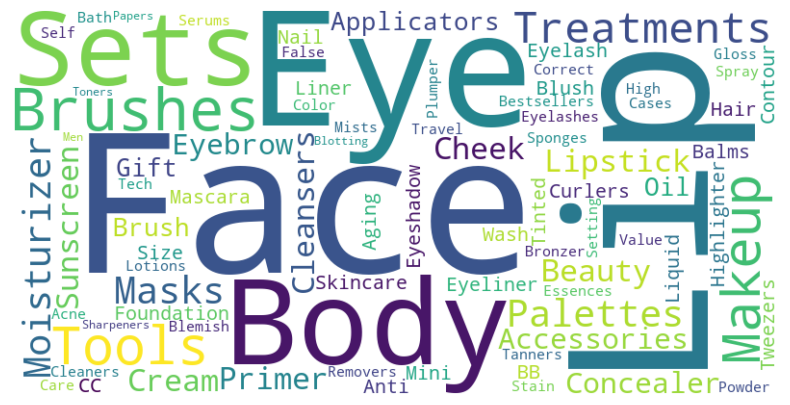

In [ ]:
# CATEGORIAS:

df_cleaned['categories'] = df_cleaned['categories'].apply(lambda x: str(x).replace('[', '').replace(']', ''))
df_cleaned['categories'].head()

# Limpieza y unión de las categorías en una sola cadena, eliminando duplicados.
unique_categories = set(
    word.strip() for row in df_cleaned['categories'].dropna() 
    for word in row.replace("'", "").split(", ")
)

# Genera la nube de palabras a partir de las palabras únicas
text_categories = " ".join(unique_categories)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

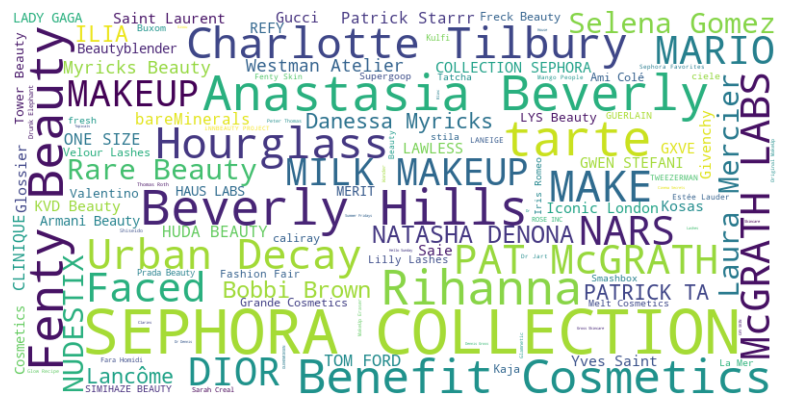

In [ ]:
# Limpiar y unir los nombres de las marcas en una sola cadena
text_brands = " ".join(df_cleaned['brand'].dropna().apply(str).str.strip())

# Nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_brands)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


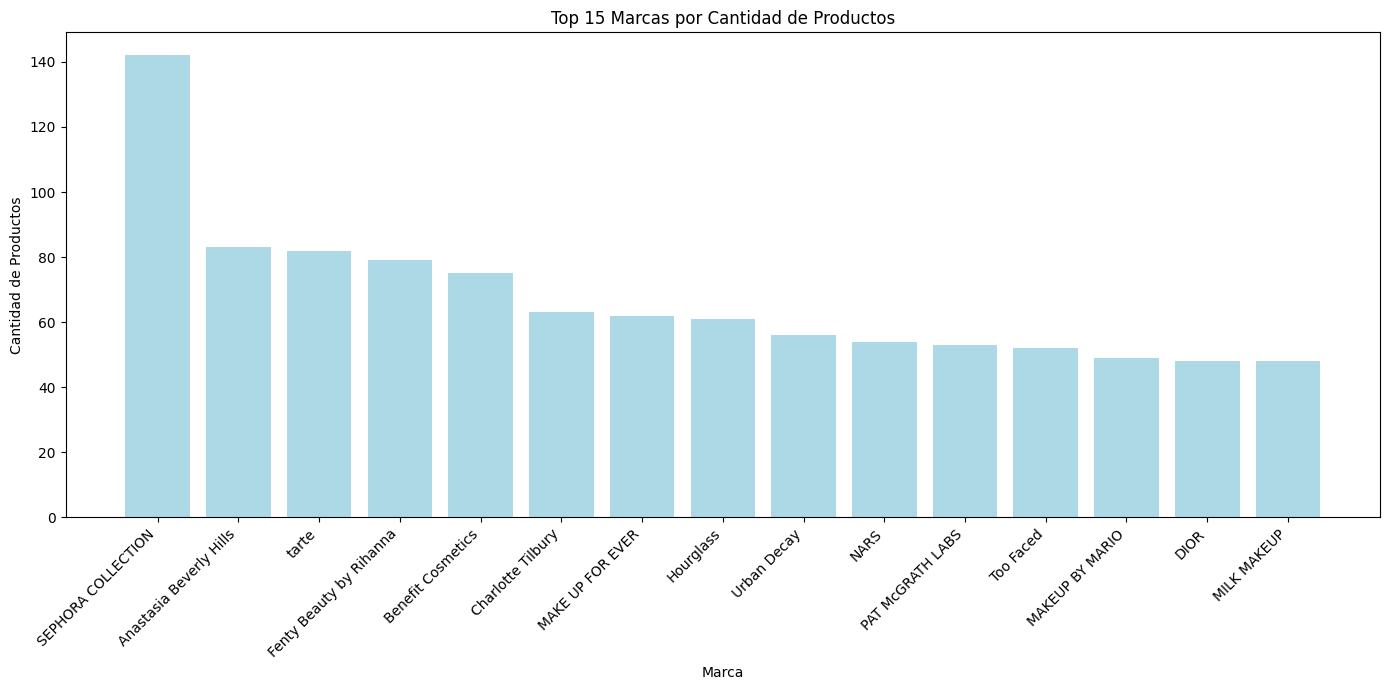

In [ ]:
# MARCAS QUE MÁS CANTIDAD DE PRODUCTOS TIENEN EN SEPHORA

# Contar las ocurrencias de cada marca y seleccionar las 15 primeras
brand_counts = df_cleaned['brand'].value_counts().head(15)

# Gráfico de barras
plt.figure(figsize=(14, 7))
plt.bar(brand_counts.index, brand_counts.values, color='lightblue')

plt.title('Top 15 Marcas por Cantidad de Productos')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Productos')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout() # Evita el solapamiento del texto

plt.show()

In [ ]:
# Agrupar por marcas, sumar los likes y seleccionar el top 10
top_liked_brands = (
    df_cleaned.groupby('brand')['lovesCount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Embudo
fig = go.Figure(go.Funnel(
    y=top_liked_brands.index,
    x=top_liked_brands.values,
    textinfo="value+percent previous"
))
fig.update_layout(
    title='Top 10 Marcas con Más Likes (LovesCount) - Embudo',
    funnelmode='stack',
)

fig.show()

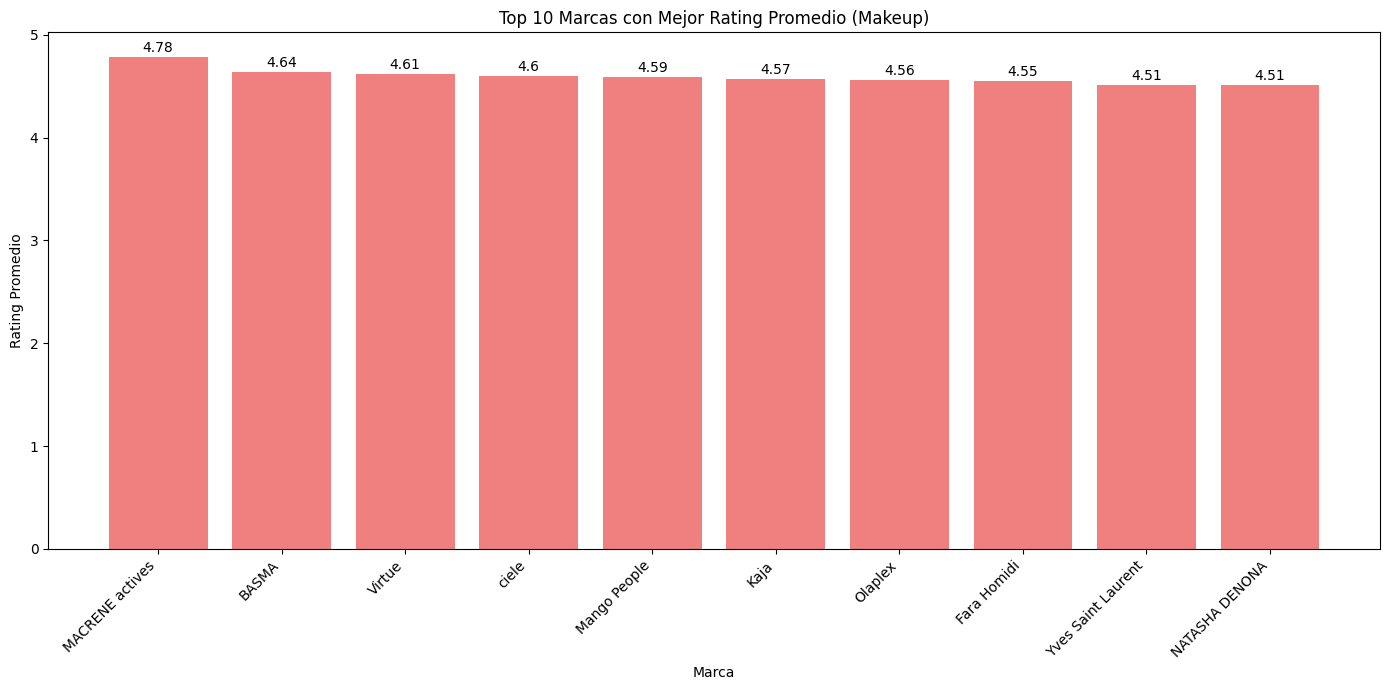

In [ ]:

# Filas donde 'categories' contiene 'Makeup'
filtered_df = df_cleaned[df_cleaned['categories'].str.contains('Makeup', case=False, na=False)]

# Ranking medio (promedio) por marca
average_ratings = filtered_df.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10)

# Gráfico de Barras
plt.figure(figsize=(14, 7))
bars = plt.bar(average_ratings.index, average_ratings.values, color='lightcoral')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Marcas con Mejor Rating Promedio (Makeup)')
plt.xlabel('Marca')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()


In [299]:
unique_brands = df_cleaned['brand'].unique()
print(unique_brands)

['ILIA' 'Rare Beauty by Selena Gomez' 'Summer Fridays' 'Benefit Cosmetics'
 'ONE/SIZE by Patrick Starrr' 'SEPHORA COLLECTION' 'Glossier' 'PATRICK TA'
 'MILK MAKEUP' 'Tower 28 Beauty' 'Saie' 'HUDA BEAUTY' 'Charlotte Tilbury'
 'REFY' 'LYS Beauty' 'Hourglass' 'MAKEUP BY MARIO' 'NARS' 'Shiseido'
 'Urban Decay' 'Fenty Skin' 'tarte' 'DIOR' 'Anastasia Beverly Hills'
 'Too Faced' 'The Ordinary' 'NATASHA DENONA' 'MAKE UP FOR EVER'
 'Fenty Beauty by Rihanna' 'Danessa Myricks Beauty' 'PAT McGRATH LABS'
 'LANEIGE' 'LAWLESS' 'Grande Cosmetics' 'Yves Saint Laurent' 'Kaja'
 'Melt Cosmetics' 'TOM FORD' 'Gisou' 'HAUS LABS BY LADY GAGA'
 'Glow Recipe' 'Kosas' 'MERIT' 'Augustinus Bader' 'Prada Beauty' 'Lancôme'
 'Topicals' 'GXVE BY GWEN STEFANI' 'NUDESTIX' 'DOMINIQUE COSMETICS'
 'Artist Couture' 'Laura Mercier' 'Viseart' 'Westman Atelier'
 'House of Lashes' 'La Mer' 'CLINIQUE' 'Armani Beauty' 'Sephora Favorites'
 'Sol de Janeiro' 'OLEHENRIKSEN' 'Glamnetic' 'Sunday Riley' 'Estée Lauder'
 'Dr. Jart+' 'Gucc

C:\Users\sandr\AppData\Local\Temp\ipykernel_14360\82749266.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




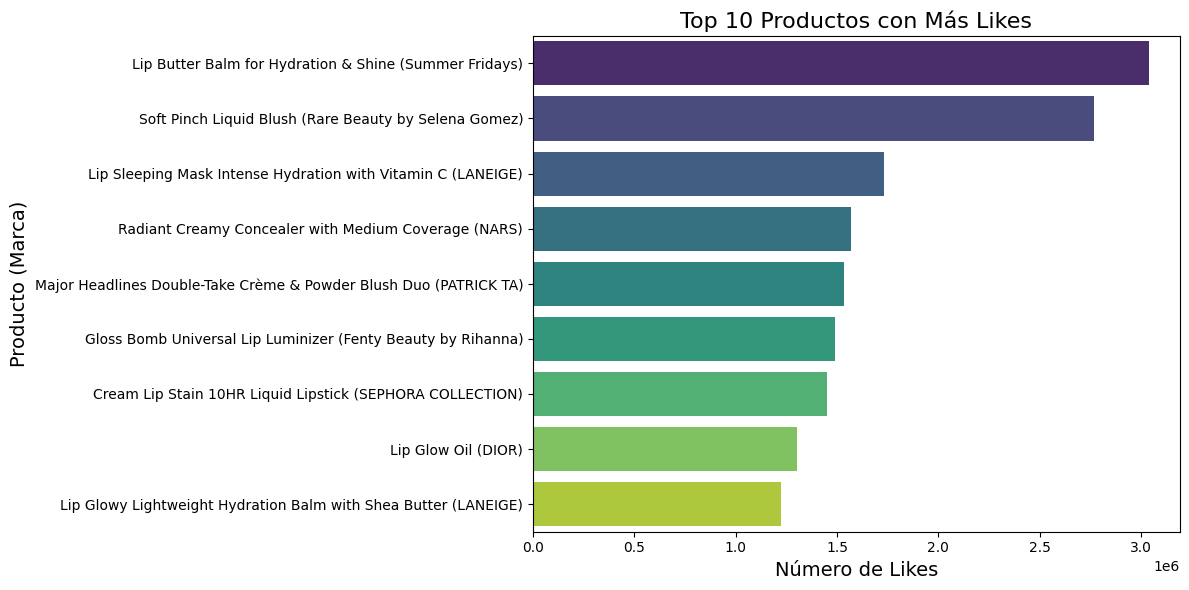

In [ ]:
# Concatenación del título del producto y la marca
df_cleaned['product_with_brand'] = df_cleaned['title'] + ' (' + df_cleaned['brand'] + ')'

top_products = (
    df_cleaned[['product_with_brand', 'lovesCount']]
    .dropna()  # Eliminar filas con valores nulos
    .sort_values(by='lovesCount', ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_products,
    x='lovesCount',
    y='product_with_brand',
    palette='viridis'
)
plt.title('Top 10 Productos con Más Likes', fontsize=16)
plt.xlabel('Número de Likes', fontsize=14)
plt.ylabel('Producto (Marca)', fontsize=14)
plt.tight_layout()

plt.show()


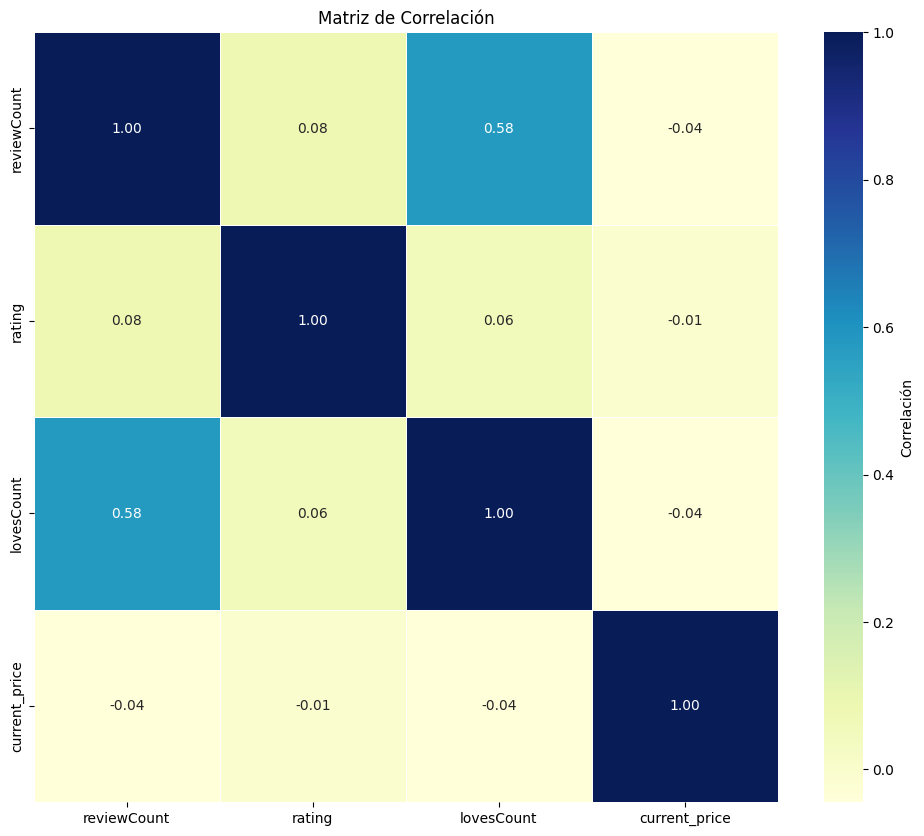

In [ ]:
# Filtro de columnas numéricas:
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Matriz de correlación:
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación')
plt.show()

In [302]:
ruta = 'C:\\Users\\sandr\\Documents\\scrp_tiktok_tfg\\data\\clean_data\\sephora_website_cleaned.csv'
df_cleaned.to_csv(ruta, index=False)


In [ ]:
# Verificar si el modelo está instalado
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("El modelo 'en_core_web_sm' no está instalado. Procediendo a instalarlo...")
    
    # Mdelo de spaCy
    subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")
    print("Modelo 'en_core_web_sm' instalado y cargado correctamente.")

file_path = "data/clean_data/url_data_cleaned.xlsx"
df = pd.read_excel(file_path)
unique_brands
df["identified_brands"] = ""

# Iterar sobre las transcripciones y buscar coincidencias
for i, transcript in enumerate(df["transcription"]):
    doc = nlp(transcript)
    identified_brands = []
    for ent in doc.ents:
        for brand in unique_brands:
            if brand.lower() in ent.text.lower():
                identified_brands.append(brand)
                break
    df.at[i, "identified_brands"] = ", ".join(identified_brands)

df.to_excel("data/clean_data/url_data_cleaned.xlsx", index=False)
print("Archivo Excel guardado con la nueva columna 'identified_brands'.")

Archivo Excel guardado con la nueva columna 'Identified Brands'.
